In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.manifold import TSNE
import seaborn as sns
from scipy import spatial
from sklearn.naive_bayes import GaussianNB


#Load and inspect dataset.


In [ ]:
dataset, info = tfds.load(
    
    "imdb_reviews/plain_text",
    split=["train[:80%]", "train[80%:]", "test"],
    as_supervised=True,
    with_info=True
)

dataset_train_original = dataset[0]
dataset_validate_original = dataset[1]
dataset_test_original = dataset[2]


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWKO743/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWKO743/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWKO743/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

#Look at beeping data


In [ ]:
for x, y in dataset_train_original.shuffle(20000).take(8):
  print(x.numpy().decode("utf-8"))
  print(y.numpy())
  print()

I first didn't want to watch this film, for the trailer gave the impression of a common and too expected film...but as I recently had the pleasure to discover the surprising "Mensonges et trahisons et plus si affinité"" which was beautifully directed and written by Laurent Tirard (screenwriter of "prête-moi ta main"), I changed my mind and decided to try it, thinking that "Prête-moi ta main", would be as good as "mensonges...". And it is absolutely not. The script is not bad, but it is not as well directed as "Mensonges...", the actors not as generous (especially Charlotte, as boring as she usually is) as Edouard Baer or Clovis Cornillac, and too be honest, I still don't understand how such crap can have such a success, even with such a casting... Anyway the story could have been a pretext to create so many interesting plots, but it is not as good as Tirard's "Mensonges..." though it's also written by him. Easy, unsurprising, and lazy work. Totally overestimated!
0

Couldn't believe it

Get same lenght and get numbers (the _ dont store it)// check stocastic gradient descend

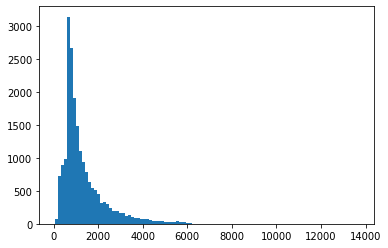

In [ ]:
lengths = []
for x, _ in tfds.as_numpy(dataset_train_original):
  lengths += [len(x)]

plt.hist(lengths, bins=100)
plt.show()
plt.close()

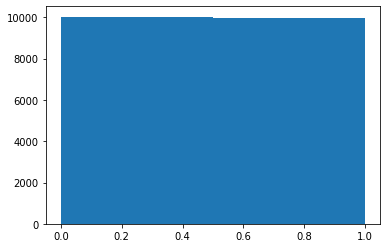

In [ ]:
labels = []
for _, y in tfds.as_numpy(dataset_train_original):
  labels += [y]

plt.hist(labels, 2)
plt.show()
plt.close()

#bag of words encoding

In [ ]:
vocabulary_size = 10000
encoder = layers.TextVectorization(
    max_tokens= vocabulary_size,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="multi_hot",
)

encoder.adapt(
    dataset_train_original.map(lambda text, label: text).batch(2048)
)

In [ ]:
vocabulary = encoder.get_vocabulary()

print("Vocabulary:",",".join(vocabulary[:100]))

print(vocabulary[0])

Vocabulary: [UNK],the,and,a,of,to,is,in,it,i,this,that,br,was,as,for,with,movie,but,film,on,not,you,his,are,have,be,he,one,its,at,all,by,an,they,who,from,so,like,her,or,just,about,if,has,out,some,there,what,good,very,when,more,she,my,even,would,up,no,which,time,only,really,story,their,had,were,see,can,me,than,we,much,well,been,get,will,also,do,into,people,other,because,bad,first,great,how,most,him,dont,then,made,movies,make,could,films,way,any,them,after
[UNK]


In [ ]:
text = "I must not fear.Fear is the mind-killer.Only I will remain"

print("Original:", text)

def multi_hot_to_string(multi_hot):
  return " ".join([str(int(x)) for x in multi_hot])

text_encoded = encoder(text).numpy()
print("Encoded:", multi_hot_to_string(text_encoded))

Original: I must not fear.Fear is the mind-killer.Only I will remain
Encoded: 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
for x, y in dataset_train_original.take(8):
  x_encoded = encoder(x).numpy()
  print("Input:", multi_hot_to_string(x_encoded))
  print("Output:", y.numpy())
  

Input: 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0

# Create a simple baseline with Naive Bayes (statistic counting)


In [ ]:
def dataset_to_numpy(dataset):

  x_input = []
  y_output = []

  for x, y in dataset.batch(2048):
      x = encoder(x).numpy()
      x_input.extend(x)
      y_output.extend(y)
  x_input = np.array(x_input) 
  y_output = np.array(y_output)   
  return x_input, y_output

x_train, y_train = dataset_to_numpy(dataset_train_original)
print(x_train.shape, y_train.shape)

x_test, y_test = dataset_to_numpy(dataset_test_original)
print(x_test.shape, y_test.shape)


(20000, 10000) (20000,)
(25000, 10000) (25000,)


In [ ]:
x_train[0], y_train[0]

(array([1., 1., 1., ..., 0., 0., 0.], dtype=float32), 0)

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
correct_predictions = (y_test == y_pred).sum()
accuracy = correct_predictions/ len(x_test)
print(f"{100*accuracy:.2f}%")

70.05%


#training Neural Network



> Indented block



In [ ]:
dataset_train = dataset_train_original.cache()
dataset_train = dataset_train.shuffle(20000)
dataset_train = dataset_train.batch(128)

#dataset_train = dataset_train_original.cache().shuffle(20000).batch(128)

In [ ]:
 dataset_validate = dataset_validate_original.cache().batch(128)

In [ ]:
#for x, y in dataset_train.take(1):
  #print(x)

In [ ]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

model.compile(
    
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    
    dataset_train,
    epochs=8,
    validation_data=dataset_validate
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1280128   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,280,257
Trainable params: 1,280,257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
157/157 [==============================] - 7s 19ms/step - loss: 0.3422 - accuracy: 0.8595 - val_loss: 0.2722 - val_accuracy: 0.8862
Epoch 2/8
157/157 [==============================] - 2s 16ms/step - loss: 0.1767 - accuracy: 0.9355 - val_loss: 0.2979 - val_accuracy: 0.8852
Epoch 3/8
157/157 [==============================] - 2s 16ms/step - loss: 0.1243 - accuracy:

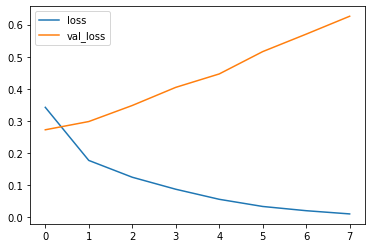

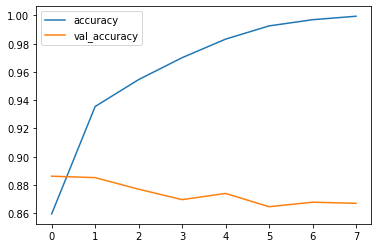

In [ ]:

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(dataset_test_original.batch(512))

49/49 [==============================] - 3s 64ms/step - loss: 0.6586 - accuracy: 0.8564


[0.6585760116577148, 0.856440007686615]

In [ ]:
model.predict(["This is a really not so good movie."])

array([[0.49248654]], dtype=float32)

In [ ]:
for x, y in dataset_validate_original.batch(1):
  prediction = model.predict(x)
  loss, acc = model.evaluate(x, y, verbose=0)
  print(prediction, y.numpy(), loss, acc)
  break

[[0.00010833]] [0] 0.00010833634587470442 1.0


In [ ]:
vocabulary_size = 10000
sequence_length = 128

In [ ]:
encoder = layers.TextVectorization(
    max_tokens=vocabulary_size,
    output_sequence_length=sequence_length,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="int"

)

encoder.adapt(dataset_train_original.map(lambda text, label: text).batch(1024))

In [ ]:
encoder.get_vocabulary()[1]

'[UNK]'

In [ ]:
encoder("This is a really good movie. The dialogs are clearly audible. The scenery is well lit.")

<tf.Tensor: shape=(128,), dtype=int64, numpy=
array([  11,    7,    4,   63,   50,   18,    2, 3197,   25,  681,    1,
          2, 1390,    7,   74, 4929,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])>

In [ ]:
text = "hello data science retreat. I am pleased to be here and have the oportunity to make it happend. Hello"
print('Original:', text)

text_encoded = encoder(text)
print('indices:', text_encoded.numpy())

def decode(indices):
  vocabulary = encoder.get_vocabulary()
  strings = [vocabulary[index] for index in indices]
  return "".join(strings)

text_decoded = decode(text_encoded)
print("Decoded:", text_decoded)

Original: hello data science retreat. I am pleased to be here and have the oportunity to make it happend. Hello
indices: [4998 9015 1065    1   10  231 3526    6   27  132    3   26    2    1
    6   94    9    1 4998    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
Decoded: hellodatascience[UNK]iampleasedtobehereandhavethe[UNK]tomakeit[UNK]hello


#create a Neuronal Network

In [ ]:
model = models.Sequential()
model.add(encoder)

model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(
    

  optimizer='adam',
  loss="binary_crossentropy",
  metrics=['accuracy']
)

history = model.fit(
    
  dataset_train,
  epochs=10,
  validation_data=dataset_validate


)
#prediction = model.predict(['this is a test string'])[0]
#plt.imshow(prediction.transpose(), cmap="inferno")

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_1 (TextVe (None, 128)               0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 128, 32)           320000    
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 513       
Total params: 2,418,177
Trainable params: 2,418,177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 4s 20ms/step - loss: 0.5266 - accuracy: 0.7150 - val_lo

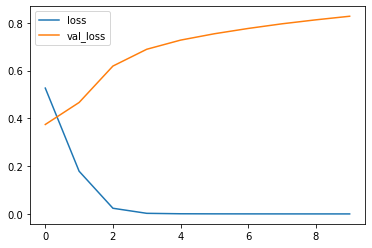

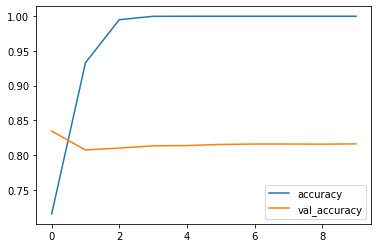

In [ ]:

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()